# Preliminary Design

This notebook serves as a guide, how to use the implemented classes and methods.


## 1. Create instances

In [1]:
from mission import Mission
from helicopter import Helicopter

# Load mission from YAML file
mission = Mission('data/missions/exercise_9.yaml') 

# Load helicopter from YAML file
concept = Helicopter('data/configurations/concept.yaml')

## 2. Call preliminary design method

In [2]:
# Premilinary design
df = concept.preliminary_design(
    mission, 
    radius_range  = (3.0, 7.0, 7), 
    chord_range   = (0.2, 0.4, 5), 
    use_ew_models = True, 
    status        = False)

This method performs a parameter sweep for rotor radius and chord, determining the maximum take-off weight, total fuel consumption, and other parameters for a given mission in a sizing loop. The calculation is based on momentum theory. The ranges for radius and chord are provided as tuples with (min, max, number of steps). If empty weight models are not used, the empty weight ratio from the input file is assumed constant. The method returns a pandas dataframe.

**Optional:** Export and read the results.

In [3]:
# Export results
df.to_csv('data/results/concept.csv', index=False)
df.to_excel('data/results/concept.xlsx', index=False)

# Read results
import pandas as pd
df = pd.read_csv('data/results/concept.csv')

For a high number of steps it makes sense to export the results to a csv file and read it before post-processing, to avoid having to run the preliminary design method again.

## 3. View Results

In [4]:
# Show dataframe
df

,Radius [m],Chord [m],MTOW [kg],Fuel [kg],EW ratio,Solidity,DL [N/m²],Blade ldg.
0,3.000000,0.20,1825.686765,270.368572,0.725929,0.084883,687.517267,0.168719
1,3.000000,0.25,1872.011126,279.292738,0.727944,0.106103,703.213226,0.138057
2,3.000000,0.30,1924.625156,288.717425,0.730484,0.127324,721.161132,0.117984
3,3.000000,0.35,1979.679355,298.386446,0.733095,0.148545,739.950372,0.103764
4,3.000000,0.40,2034.681944,308.131683,0.735520,0.169765,758.711468,0.093095
5,3.666667,0.20,1825.127423,257.484830,0.732904,0.069449,461.111085,0.138305
6,3.666667,0.25,1879.594560,267.325591,0.735408,0.086812,473.520973,0.113621
7,3.666667,0.30,1934.137652,277.226660,0.737750,0.104174,485.944026,0.097169
8,3.666667,0.35,1993.625492,287.449726,0.740448,0.121537,499.561826,0.085621
9,3.666667,0.40,2057.270306,297.963493,0.743367,0.138899,514.159085,0.077108


**Columns:**
- *Radius [m]*: Rotor radius.
- *Chord [m]*: Chord length.
- *MTOW [kg]*: Maximum take-off weight, result of the sizing loop for each case.
- *Fuel [kg]*: Total fuel consumption for the given mission, based on the converged MTOW.
- *EW ratio*: Empty weight ratio, defined by the implemented empirical empty weight models.
- *Solidity*: Rotor solidity (rectangular approximation).
- *DL [N/m²]*: Max. disc loading.
- *Blade ldg.*: Max. blade loading, $C_T/\sigma$.

**Optional:** Change pandas settings.

In [5]:
# Pandas settings
import pandas as pd
pd.set_option('display.precision', 3, 'display.max_rows', 30)

### Sort

In [6]:
# Sort by fuel consumption
df.sort_values(by='Fuel [kg]')

,Radius [m],Chord [m],MTOW [kg],Fuel [kg],EW ratio,Solidity,DL [N/m²],Blade ldg.
15,5.000,0.20,1862.208,250.236,0.742,0.051,253.073,0.104
20,5.667,0.20,1888.809,250.581,0.746,0.045,199.706,0.093
10,4.333,0.20,1839.842,251.998,0.738,0.059,332.968,0.118
25,6.333,0.20,1917.987,252.227,0.749,0.040,162.194,0.084
30,7.000,0.20,1948.836,254.727,0.751,0.036,134.762,0.077
...,...,...,...,...,...,...,...,...
33,7.000,0.35,2258.772,302.488,0.764,0.064,154.333,0.050
24,5.667,0.40,2228.322,304.533,0.760,0.090,232.364,0.054
4,3.000,0.40,2034.682,308.132,0.736,0.170,758.711,0.093
29,6.333,0.40,2297.394,311.151,0.764,0.080,191.449,0.050


### Filter

In [7]:
# Filter by blade loading limit
df.loc[df['Blade ldg.'] < 0.07].sort_values(by='Fuel [kg]')

,Radius [m],Chord [m],MTOW [kg],Fuel [kg],EW ratio,Solidity,DL [N/m²],Blade ldg.
31,7.000,0.25,2046.649,270.457,0.755,0.045,140.917,0.065
22,5.667,0.30,2049.400,277.161,0.753,0.067,215.119,0.066
27,6.333,0.30,2096.098,281.261,0.756,0.060,175.890,0.061
32,7.000,0.30,2148.161,286.336,0.760,0.055,147.327,0.056
18,5.000,0.35,2081.084,286.743,0.752,0.089,280.037,0.065
23,5.667,0.35,2137.007,290.755,0.756,0.079,223.554,0.059
28,6.333,0.35,2196.704,296.165,0.760,0.070,183.666,0.054
14,4.333,0.40,2104.222,296.532,0.750,0.118,376.310,0.067
19,5.000,0.40,2163.055,299.354,0.755,0.102,290.185,0.059
33,7.000,0.35,2258.772,302.488,0.764,0.064,154.333,0.050


### Add Columns

In [8]:
# Add column, e.g.
df['Quality'] = df['Fuel [kg]'] + 0.1 * df['MTOW [kg]']
df.sort_values(by='Quality')

,Radius [m],Chord [m],MTOW [kg],Fuel [kg],EW ratio,Solidity,DL [N/m²],Blade ldg.,Quality
10,4.333,0.20,1839.842,251.998,0.738,0.059,332.968,0.118,435.982
15,5.000,0.20,1862.208,250.236,0.742,0.051,253.073,0.104,436.457
20,5.667,0.20,1888.809,250.581,0.746,0.045,199.706,0.093,439.462
5,3.667,0.20,1825.127,257.485,0.733,0.069,461.111,0.138,439.998
25,6.333,0.20,1917.987,252.227,0.749,0.040,162.194,0.084,444.026
...,...,...,...,...,...,...,...,...,...
28,6.333,0.35,2196.704,296.165,0.760,0.070,183.666,0.054,515.836
24,5.667,0.40,2228.322,304.533,0.760,0.090,232.364,0.054,527.366
33,7.000,0.35,2258.772,302.488,0.764,0.064,154.333,0.050,528.365
29,6.333,0.40,2297.394,311.151,0.764,0.080,191.449,0.050,540.891


## 4. Choose configuration

In [9]:
# Choose configuration
concept.main_rotor.radius = 5.5
concept.main_rotor.chord = 0.25
concept.mtow = 2500

# Evaluate performance
values = concept.evaluate(mission)

It's possible to set rotor radius, chord, and maximum take-off weight in a new input file, e.g. `final_configuration.yaml` and use it for evaluation, but for simplicity, we overwrite the desired values here.

## 5. Plots

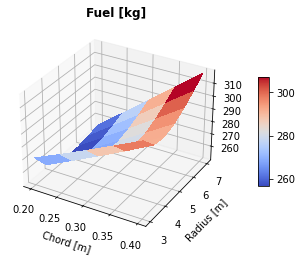

In [10]:
# Fuel consumption
concept.plot_results(df, 'Fuel [kg]')

Influence of the radius:
- The fuel consumption depends on the total power
- A larger radius causes an increase in profile power, but also allows for lower induced velocity and induced power
- Optimum depends on which flight state dominates, e.g. high payload hover or fast forward flight

Influence of the chord:
- No effect on the induced power due to momentum theory
- A larger chord increases the profile power and therefore the fuel consumption
- Optimum at low chord lengths, but feasibility depends on the stall limit of the rotor (blade loading can be used as an indicator)

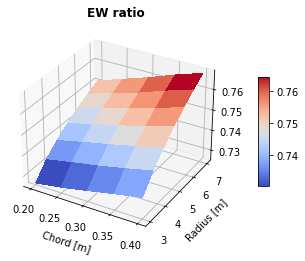

In [11]:
# EW ratio
concept.plot_results(df, 'EW ratio')

If empty weight models are used, the main rotor weight increases with radius and chord, resulting in a higher empty weight ratio. Without the empirical models, the ratio is assumed constant.

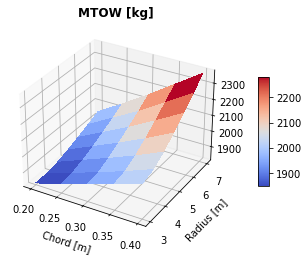

In [12]:
# MTOW
concept.plot_results(df, 'MTOW [kg]')

The maximum take-off weight is directly dependent on the fuel demand; more fuel means the total weight increases. If empty weight models are used, there is an additional offset; a lower EW ratio results in a lower MTOW.

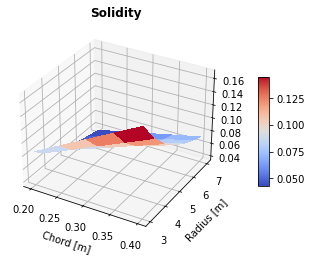

In [13]:
# Solidity
concept.plot_results(df, 'Solidity')

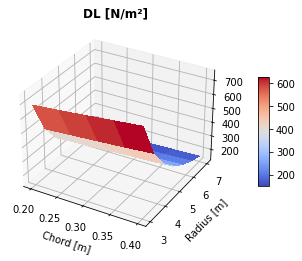

In [14]:
# Disc loading
concept.plot_results(df, 'DL [N/m²]')

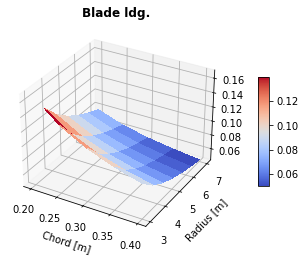

In [15]:
# Blade loading
concept.plot_results(df, 'Blade ldg.')

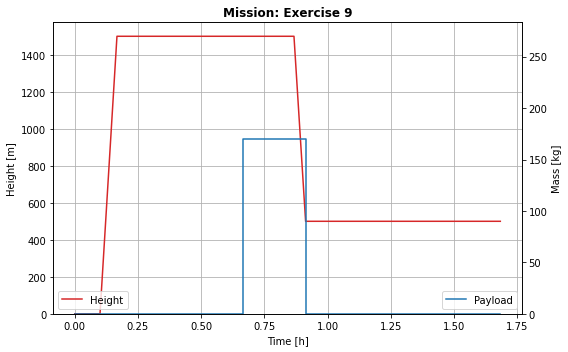

In [16]:
# Mission
mission.plot_mission()

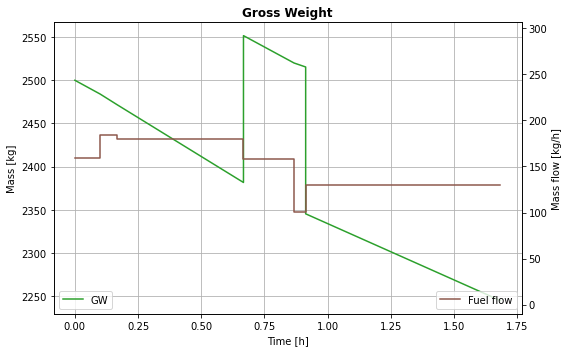

In [17]:
# Gross weight over time
concept.plot_gross_weight_over_time(mission, values['fuel'])

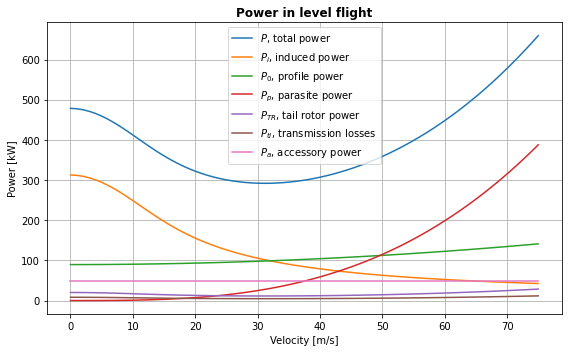

In [18]:
# Power curves
concept.plot_power_curves(concept.mtow, mission.density[0], 75)

The rest of the plots are flight state specific and depend on a range of parameters. For simplicity, example values are passed as arguments.

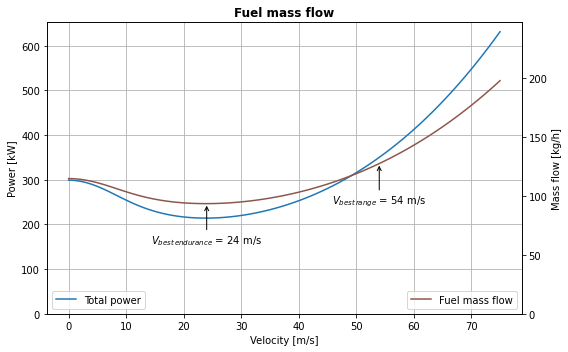

In [19]:
# Fuel curve
concept.plot_fuel_curve(1500, 1.225, 287, 101325, 75)

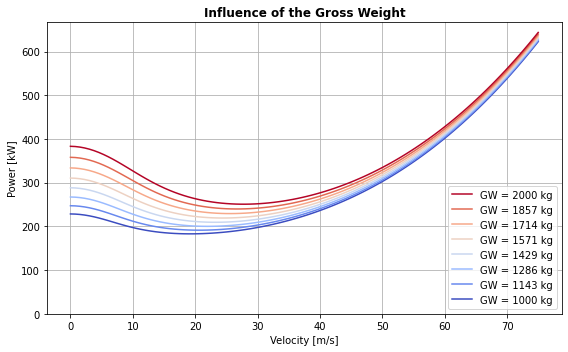

In [20]:
# Gross weight sweep
concept.plot_power_sweep_gw((1000, 2000, 8), 1.225)

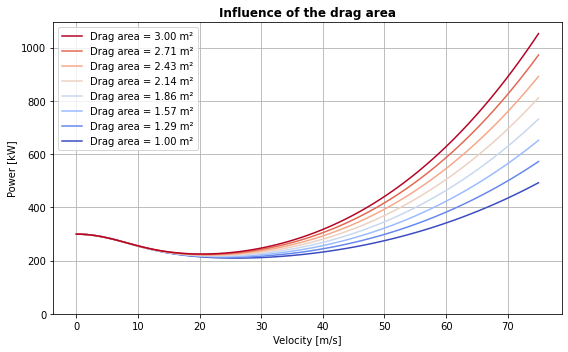

In [21]:
# Drag area sweep
concept.plot_power_sweep_drag_area((1, 3, 8), 1500, 1.225)

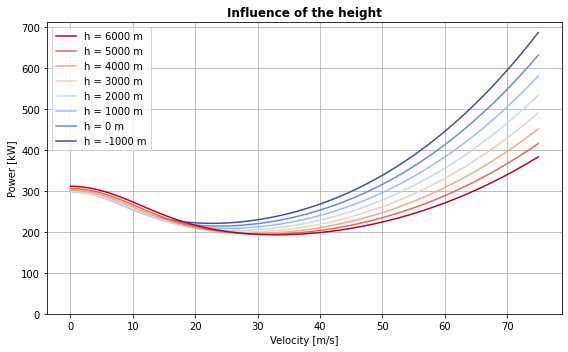

In [22]:
# Height sweep
concept.plot_power_sweep_height((-1000, 6000, 8), 1500)

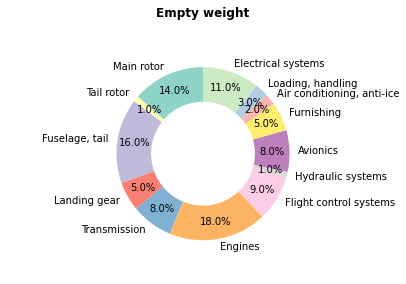

In [23]:
# Empty weight composition
concept.plot_empty_weight_pie(concept.empty_weight_estimation(250, 1e5))

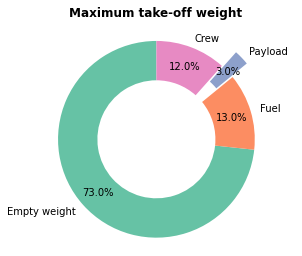

In [24]:
# MTOW composition
concept.plot_masses_pie(concept.mass_estimation(1e5, 250, 230, 50, True))

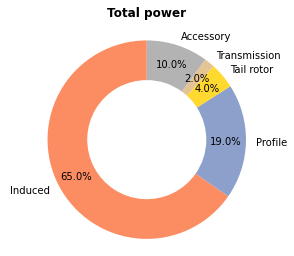

In [25]:
# Power composition
concept.plot_powers_pie(values['powers'][0])

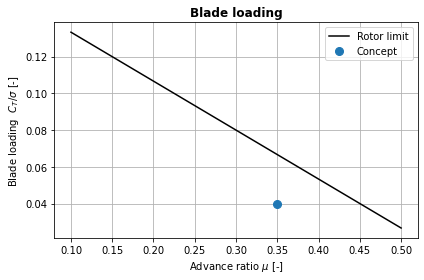

In [26]:
# Blade loading
concept.plot_blade_loading(0.04, 0.35)